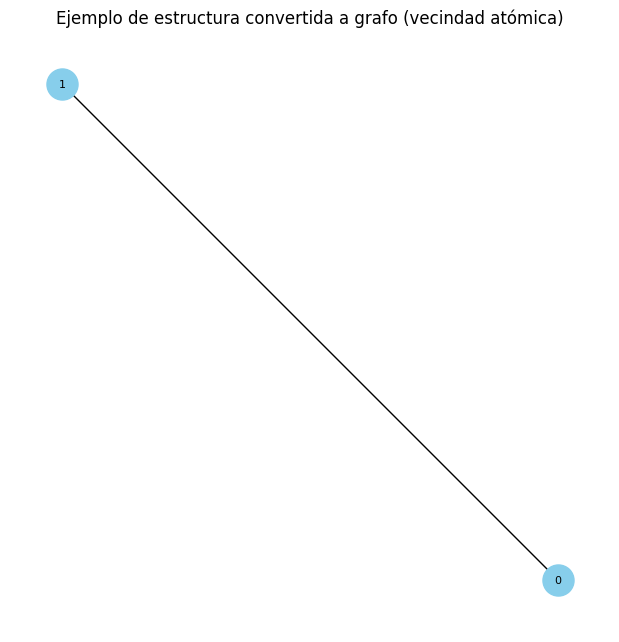

In [1]:
from matminer.datasets import load_dataset
import networkx as nx
import matplotlib.pyplot as plt

df = load_dataset("matbench_mp_e_form")
structure = df.iloc[0]['structure']  # estructura atómica de un material

# Crear grafo simple basado en la red de vecinos cercanos
G = nx.Graph()

# Agregar nodos (átomos)
for i, site in enumerate(structure.sites):
    G.add_node(i, element=site.species_string)

# Agregar aristas si están suficientemente cerca (enlace químico aproximado)
for i, site_i in enumerate(structure.sites):
    for j, site_j in enumerate(structure.sites):
        if i < j and site_i.distance(site_j) < 3.0:  # distancia umbral en angstroms
            G.add_edge(i, j)

# Dibujar grafo
plt.figure(figsize=(6,6))
nx.draw(G, with_labels=True, node_color='skyblue', font_size=8, node_size=500)
plt.title("Ejemplo de estructura convertida a grafo (vecindad atómica)")
plt.show()
